
# 💳 Credit Card Fraud Detection

This project uses machine learning to detect fraudulent credit card transactions. It includes data preprocessing, feature engineering, model comparison, threshold tuning, and evaluation on an imbalanced dataset. The final model, XGBoost, is optimized for high recall, making it suitable for real-world fraud prevention systems.


In [ ]:
import pandas as pd
import numpy as np

## Visualize

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()
#Time : Seconds elapsed between this transaction and the first in the dataset
#V1-V28 : Anonymous features (created using PCA to protect sensitive info)
#Amount : Transaction amount in euros
#Class : 0 legit / 1 fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import seaborn as sns #Built on top of matplotlib, good for statistical visualization
import matplotlib.pyplot as plt #drawing tool for graphs and charts / pyplot simple interface

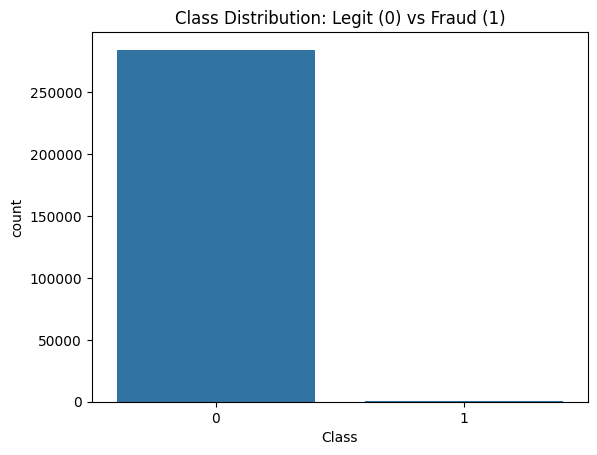

In [ ]:
# Plot the class distribution
sns.countplot(x='Class', data=df) #count how many transactions have =0/1
# x-axis
plt.title("Class Distribution: Legit (0) vs Fraud (1)")
plt.show()

In [ ]:
df['Class'].value_counts()


,count
Class,
0,284315
1,492


## PreProcessing Data

In [ ]:
#Seperate features from labek
X = df.drop('Class', axis=1) #all features
y = df['Class'] #label 0/1

In [ ]:
#Scale Amount and Time -> because Amount and Time have large ranges
#df[['Time', 'Amount', 'V1', 'V2']].describe()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])



In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training 30 test
#random_state=42 → ensures the split is always the same every time you run it

## Training: LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
model = LogisticRegression(max_iter=1000) #Logistic Regression may need more iterations to converge due to the size of the data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)



## UnderSampling


In [ ]:
#Seperate fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

#undersample the non-fraud
non_fraud = non_fraud.sample(len(fraud), random_state=42)

#combine both to create a balanced set
balanced_df = pd.concat([fraud, non_fraud])

#shuffle the data
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)




Class
0    492
1    492
Name: count, dtype: int64


## Train/Test on Balanced data (LR)


In [ ]:
from sklearn.model_selection import train_test_split
#split
X_balanced = balanced_df.drop('Class', axis=1)
y_balanced = balanced_df['Class']

#split into 80 train 20 test
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

## Compare Balanced vs Unbalanced (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train

model_bal = LogisticRegression(max_iter=1000)
model_bal.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred_bal = model_bal.predict(X_test_balanced)

[[ 81   6]
 [  9 101]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        87
           1       0.94      0.92      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Feature Engineering

In [ ]:
df['Hour'] = (df['Time'] // 3600) % 24


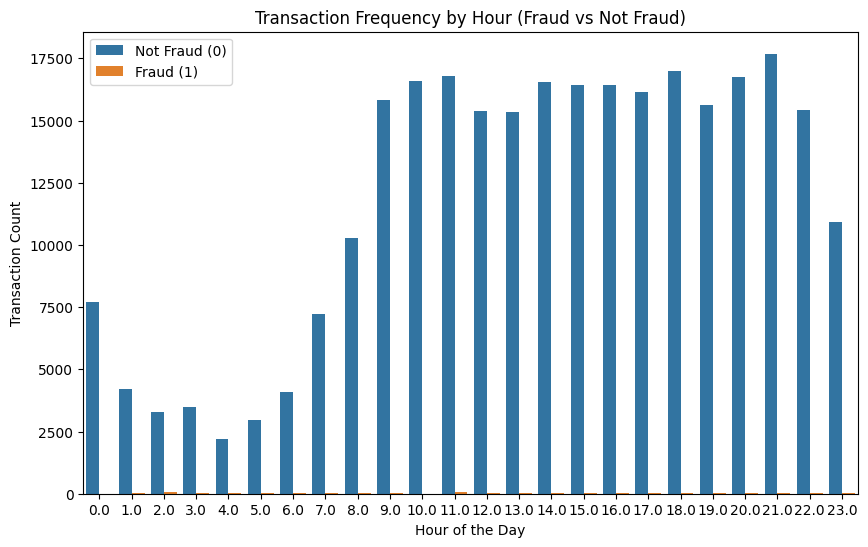

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Hour' , hue='Class' , data=df)
plt.title('Transaction Frequency by Hour (Fraud vs Not Fraud)')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.legend(['Not Fraud (0)' , 'Fraud (1)'])
plt.show()

In [ ]:
df['LogAmount'] = np.log1p(df['Amount'])

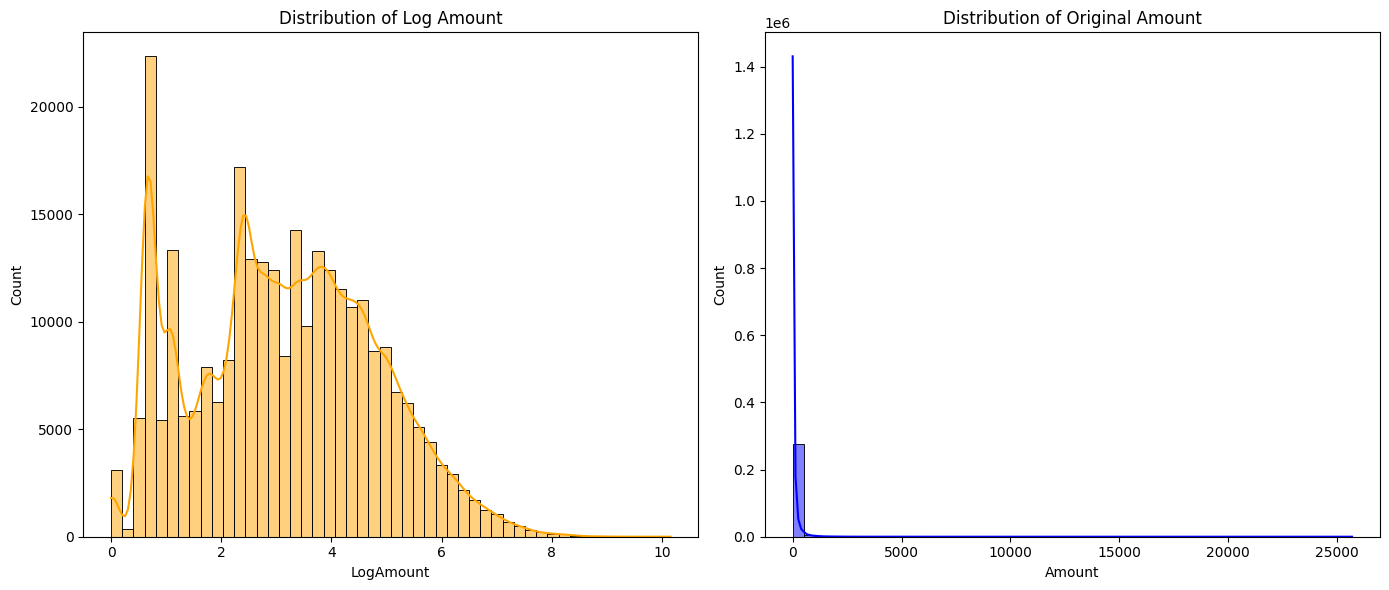

In [ ]:
#Comparing original and log amount
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(df['LogAmount'], bins=50 , kde=True , color='orange')
plt.title('Distribution of Log Amount')


plt.subplot(1,2,2)
sns.histplot(df['Amount'], bins=50 , kde=True , color='blue')
plt.title('Distribution of Original Amount')

plt.tight_layout()
plt.show()

## Feature Selection

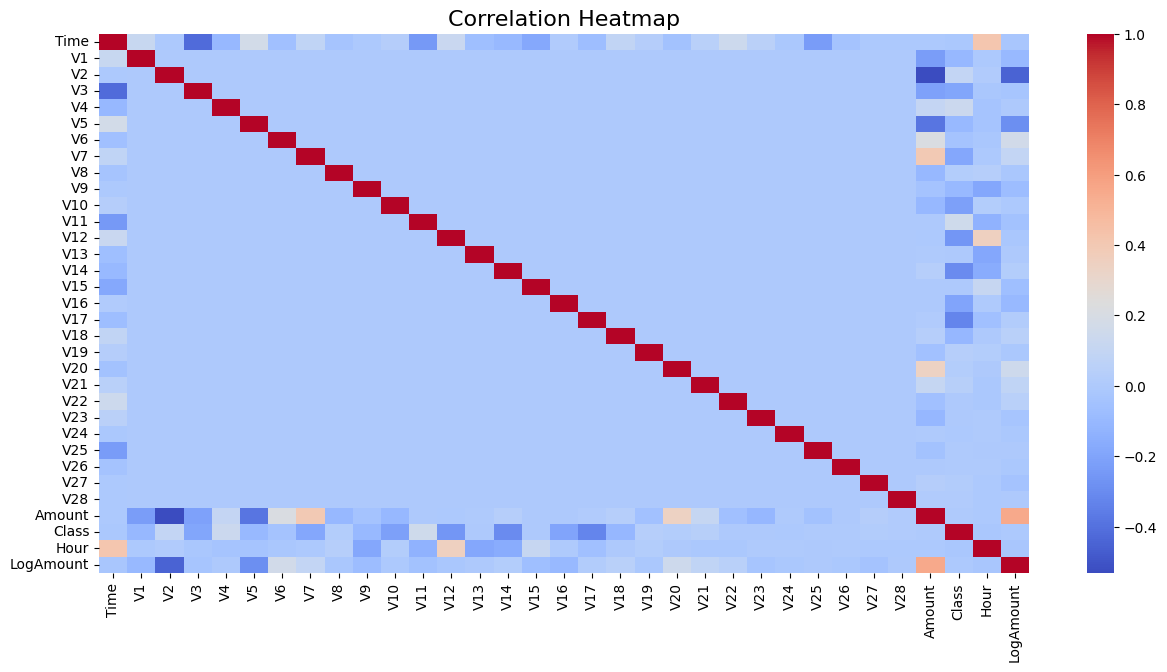

In [ ]:
plt.figure(figsize=(15,7))
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=False)
plt.title("Correlation Heatmap" , fontsize=16)
plt.show()

In [ ]:
#corr matrix
corr_matrix = df.corr()

# Get absolute correlation values with the target 'Class'
corr_with_target = corr_matrix['Class'].abs()

# Sort features by correlation with the target
top_corr_features = corr_with_target.sort_values(ascending=False)


Top correlated features with Class : 
 Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64


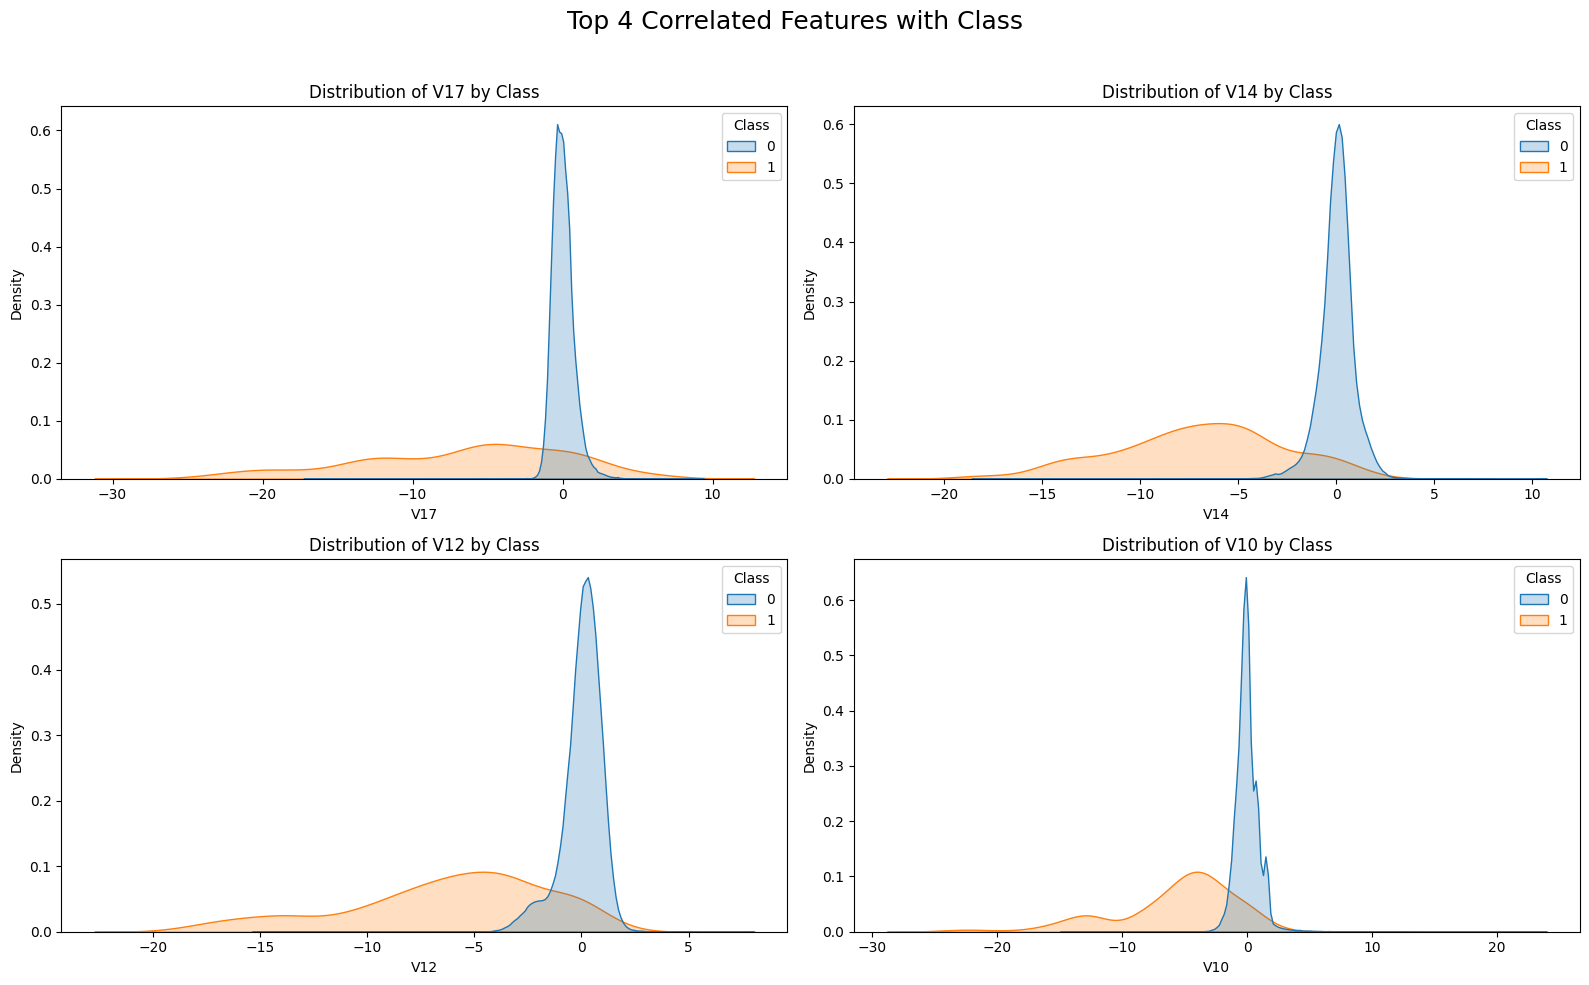

In [ ]:
#Calculate correlations with class
corr_matrix = df.corr()
top_corr_features = corr_matrix['Class'].drop('Class').abs().sort_values(ascending=False)
top_features = top_corr_features.head(4).index.tolist()

#Setup 2 rows 2 colomns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

#plot each kde in subplot

for idx, feature in enumerate(top_features):
    sns.kdeplot(data=df, x=feature, hue='Class', common_norm=False, fill=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature} by Class')

#global title
plt.suptitle('Top 4 Correlated Features with Class', fontsize=18)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

#Predict
y_pred = rf_model.predict(X_test)

#Evaluate
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[82970  2337]
 [    3   133]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.98      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.98      0.54     85443
weighted avg       1.00      0.97      0.98     85443



## XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
#initialize model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)

#predict
y_pred_xgb = xgb_model.predict(X_test)

#evaluate
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_xgb))



Confusion Matrix:
[[81866  3441]
 [    2   134]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.99      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.97      0.53     85443
weighted avg       1.00      0.96      0.98     85443



## LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#initialize model
lgb_model = lgb.LGBMClassifier(random_state=42,verbose=-1)
lgb_model.fit(X_train_balanced, y_train_balanced)

#predict
y_pred_lgb = lgb_model.predict(X_test)

#evaluate
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lgb))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_lgb))

Confusion Matrix:
[[82831  2476]
 [    1   135]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.99      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.98      0.54     85443
weighted avg       1.00      0.97      0.98     85443



## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
#create/Train
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svm_model.fit(X_train_balanced, y_train_balanced)

#Predict
svm_model_pred = svm_model.predict(X_test)

#evaluate
print('Confusion Matrix:')
print(confusion_matrix(y_test, svm_model_pred))
print('\nClassification Report:')
print(classification_report(y_test, svm_model_pred))

Confusion Matrix:
[[81790  3517]
 [    9   127]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.03      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.52     85443
weighted avg       1.00      0.96      0.98     85443



## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#initialize/train
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_balanced, y_train_balanced)

#Predict
y_pred_mlp = mlp.predict(X_test)

#evaluate
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_mlp))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_mlp))

Confusion Matrix:
[[69645 15662]
 [    7   129]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     85307
           1       0.01      0.95      0.02       136

    accuracy                           0.82     85443
   macro avg       0.50      0.88      0.46     85443
weighted avg       1.00      0.82      0.90     85443



## Testing RandomForest

In [ ]:
# Retrain on full balanced data
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_balanced, y_balanced)



RandomForestClassifier(random_state=42)

In [ ]:
#Predict
y_predict_final = rf_final.predict(X_test)

#Evaluate
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_predict_final))
print('\nClassification Report:')
print(classification_report(y_test, y_predict_final))

Confusion Matrix:
[[83020  2287]
 [    1   135]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.06      0.99      0.11       136

    accuracy                           0.97     85443
   macro avg       0.53      0.98      0.55     85443
weighted avg       1.00      0.97      0.99     85443



## Optimizing

In [ ]:
#GridSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#Define param grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'class_weight': [None, 'balanced']
}


#initialize model
rf_model = RandomForestClassifier(random_state=42)

#GridSearch with 5-fold
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [ ]:
print("Best Parameters Found:")
print(grid_search.best_params_)


Best Parameters Found:
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:


y_pred_best = best_rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Confusion Matrix:
[[83302  2005]
 [    5   131]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.96      0.12       136

    accuracy                           0.98     85443
   macro avg       0.53      0.97      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
import joblib

In [ ]:
# Save the trained model
joblib.dump(rf_final, 'random_forest_fraud_model.pkl')


['random_forest_fraud_model.pkl']

In [ ]:
from google.colab import files
files.download('random_forest_fraud_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing New/Unseen DataSet

In [ ]:
new_df = pd.read_csv('creditcard2.csv')

In [ ]:
new_df.columns



Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Refit the scaler on the correct data
scaler = StandardScaler()
scaler.fit(X_balanced)

# Now transform the new data
X_new = new_df.drop('class', axis=1)
X_new_scaled = scaler.transform(X_new)

# Then predict
y_pred_new = rf_final.predict(X_new_scaled)




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# If new_df['class'] is available:
y_true_new = new_df['class']

print("Confusion Matrix:")
print(confusion_matrix(y_true_new, y_pred_new))

print("\nClassification Report:")
print(classification_report(y_true_new, y_pred_new))


Confusion Matrix:
[[284183    132]
 [   337    155]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.54      0.32      0.40       492

    accuracy                           1.00    284807
   macro avg       0.77      0.66      0.70    284807
weighted avg       1.00      1.00      1.00    284807



In [ ]:
import numpy as np

unique, counts = np.unique(y_pred_new, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(284520), np.int64(1): np.int64(287)}


In [ ]:
new_df['predicted_class'] = y_pred_new




        Time         V1        V2         V3        V4         V5         V6  \
1632  1264.0 -11.140706 -9.612726 -12.389545  6.013346 -32.092129  21.393069   
5652  5896.0  -4.714214  3.917665  -1.304351  0.740001   0.399374   3.014229   
6336  7543.0   0.329594  3.712889  -5.775935  6.078266   1.667359  -2.420168   
6717  8408.0  -1.813280  4.917851  -5.926130  5.701500   1.204393  -3.035138   
6719  8415.0  -0.251471  4.313523  -6.891438  6.796797   0.616297  -2.966327   

             V7         V8        V9  ...       V22       V23       V24  \
1632  34.303177  -7.520784 -1.925732  ...  1.366110 -2.925888  0.843551   
5652 -12.968670 -23.249718 -1.205578  ...  2.815903 -2.500141  0.103135   
6336  -0.812891   0.133080 -2.214311  ... -0.652450 -0.551572 -0.716522   
6717  -1.713402   0.561257 -3.796354  ... -0.406427 -0.737018 -0.279642   
6719  -2.436653   0.489328 -3.371639  ... -0.546126 -0.605240 -0.263743   

           V25       V26       V27       V28   Amount  class  predic

In [ ]:
new_df.to_csv("fraud_predictions.csv", index=False)


In [ ]:
y_proba_new = rf_final.predict_proba(X_new_scaled)[:, 1]  # Probability of class 1 (fraud)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]

for thresh in thresholds:
    print(f"\n--- Threshold: {thresh} ---")
    y_pred_thresh = (y_proba_new >= thresh).astype(int)
    cm = confusion_matrix(y_true_new, y_pred_thresh)
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_true_new, y_pred_thresh, digits=2))



--- Threshold: 0.1 ---
Confusion Matrix:
[[101404 182911]
 [    23    469]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53    284315
           1       0.00      0.95      0.01       492

    accuracy                           0.36    284807
   macro avg       0.50      0.65      0.27    284807
weighted avg       1.00      0.36      0.52    284807


--- Threshold: 0.2 ---
Confusion Matrix:
[[257743  26572]
 [   124    368]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    284315
           1       0.01      0.75      0.03       492

    accuracy                           0.91    284807
   macro avg       0.51      0.83      0.49    284807
weighted avg       1.00      0.91      0.95    284807


--- Threshold: 0.3 ---
Confusion Matrix:
[[279315   5000]
 [   215    277]]
Classification Report:
              precision    recall  f1-score   

# XGBoost with tuning

In [ ]:
# Assuming new_df is your new test dataset
neg, pos = np.bincount(y_balanced)
scale_pos_weight = neg / pos


In [ ]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_balanced, y_balanced)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:37:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_proba_xgb = xgb_model.predict_proba(X_new_scaled)[:, 1]


In [ ]:
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    y_pred_xgb = (y_proba_xgb >= threshold).astype(int)
    print(f"\n--- Threshold: {threshold} ---")
    print(confusion_matrix(y_pred_new, y_pred_xgb))
    print(classification_report(y_pred_new, y_pred_xgb, digits=2))



--- Threshold: 0.1 ---
[[282403   2117]
 [    13    274]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284520
           1       0.11      0.95      0.20       287

    accuracy                           0.99    284807
   macro avg       0.56      0.97      0.60    284807
weighted avg       1.00      0.99      1.00    284807


--- Threshold: 0.2 ---
[[283936    584]
 [    46    241]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284520
           1       0.29      0.84      0.43       287

    accuracy                           1.00    284807
   macro avg       0.65      0.92      0.72    284807
weighted avg       1.00      1.00      1.00    284807


--- Threshold: 0.3 ---
[[284277    243]
 [    75    212]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284520
           1       0.47      0.74      0.57       287

    a

## Best Model (XGB with threshold 0.5)

In [ ]:
def predict_with_threshold(model, X, threshold=0.5):
    proba = model.predict_proba(X)[:, 1]
    return (proba >= threshold).astype(int)



In [ ]:
best_model = xgb_model


In [ ]:
y_pred_final = predict_with_threshold(xgb_model, X_new_scaled, threshold=0.5)


## Precision-Recall Curve

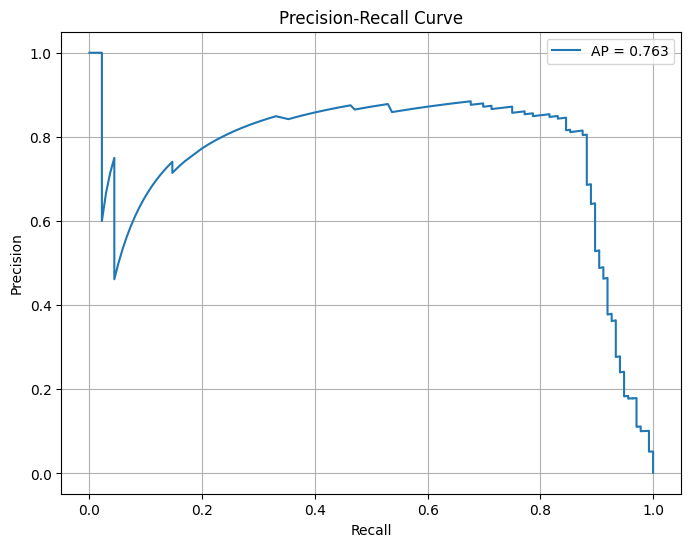

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_scores = best_model.predict_proba(X_test)[:, 1]  # best_model = your final chosen model
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {ap_score:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


## Feature Importance Plot

/tmp/ipython-input-10852342.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


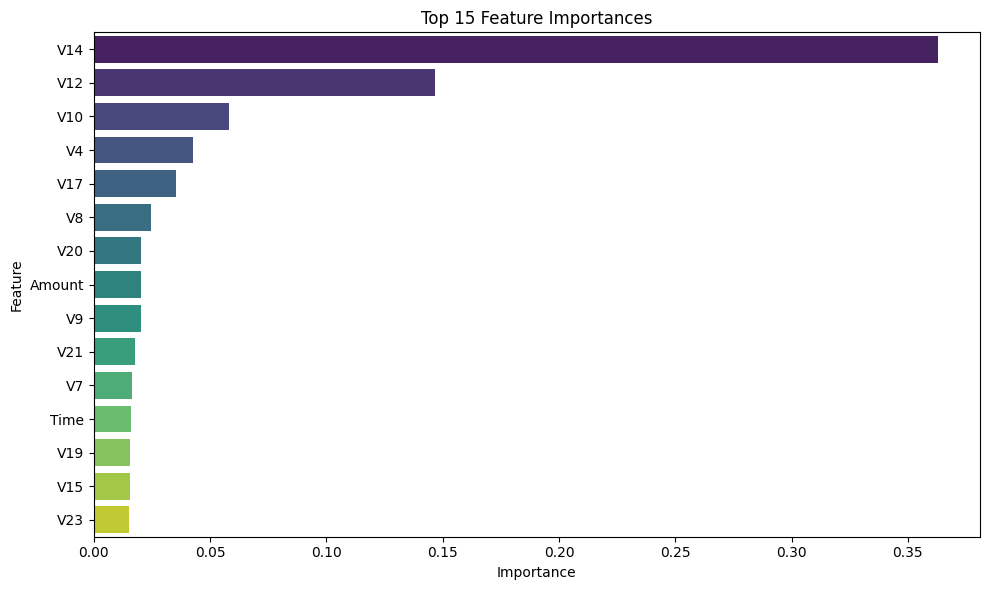

In [ ]:
import pandas as pd
import seaborn as sns

importances = best_model.feature_importances_
feature_names = X.columns  # Make sure you used a DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(xgb_model, 'best_fraud_model_xgb.pkl')


['best_fraud_model_xgb.pkl']

# Function to Test a single Transaction

In [ ]:
def predict_transaction(transaction_df, model, threshold=0.5):
    # Assume transaction_df is a one-row DataFrame with the same features
    scaled = scaler.transform(transaction_df)
    prob = model.predict_proba(scaled)[:, 1]
    return "Fraud" if prob >= threshold else "Not Fraud", prob

